In [1]:
# Utilities

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve


from sklearn.naive_bayes import MultinomialNB,CategoricalNB,GaussianNB

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold

In [2]:

#df=pd.read_csv("..\..\prepared_ravdess_features.csv")
df=pd.read_csv("prepared_ravdess_features.csv")
df.head()

vocal_channel    emotion emotional_intensity                     statement  \
0        speech    fearful              normal  Dogs are sitting by the door   
1        speech      angry              normal  Dogs are sitting by the door   
2        speech      happy              strong  Dogs are sitting by the door   
3        speech  surprised              normal  Kids are talking by the door   
4          song      happy              strong  Dogs are sitting by the door   

  repetition sex  frame_width  length_ms  zero_crossings_sum  mfcc_mean  ...  \
0        2nd   F            2       3737               16995 -33.485947  ...   
1        1st   F            2       3904               13906 -29.502108  ...   
2        2nd   F            2       4671               18723 -30.532463  ...   
3        1st   F            2       3637               11617 -36.059555  ...   
4        2nd   F            2       4404               15137 -31.405996  ...   

   stft_std  stft_min  stft_kur  stft_skew          mean       std       min  \
0  0.335533       0.0 -1.215025   0.403514  3.844916e-07  0.014482 -0.128632   
1  0.352380       0.0 -1.384174   0.290905 -7.149491e-08  0.020417 -0.305725   
2  0.352270       0.0 -1.242947   0.470350  2.429985e-06  0.024317 -0.137482   
3  0.360552       0.0 -1.445318   0.274756  2.373929e-07  0.003561 -0.027374   
4  0.350655       0.0 -1.366742   0.318926  8.454691e-07  0.027522 -0.192169   

        max        kur      skew  
0  0.138947   9.406061  0.273153  
1  0.263062  19.564187  0.292157  
2  0.166351   4.881241  0.302659  
3  0.024078  13.040259 -0.081014  
4  0.242676   7.485109  0.414872  

[5 rows x 30 columns]

In [3]:
df_copy=df.copy()

cat_var=["vocal_channel","emotional_intensity","statement","repetition","sex"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])
df_copy.head()

vocal_channel    emotion  emotional_intensity  statement  repetition  sex  \
0              1    fearful                    0          0           1    0   
1              1      angry                    0          0           0    0   
2              1      happy                    1          0           1    0   
3              1  surprised                    0          1           0    0   
4              0      happy                    1          0           1    0   

   frame_width  length_ms  zero_crossings_sum  mfcc_mean  ...  stft_std  \
0            2       3737               16995 -33.485947  ...  0.335533   
1            2       3904               13906 -29.502108  ...  0.352380   
2            2       4671               18723 -30.532463  ...  0.352270   
3            2       3637               11617 -36.059555  ...  0.360552   
4            2       4404               15137 -31.405996  ...  0.350655   

   stft_min  stft_kur  stft_skew          mean       std       min       max  \
0       0.0 -1.215025   0.403514  3.844916e-07  0.014482 -0.128632  0.138947   
1       0.0 -1.384174   0.290905 -7.149491e-08  0.020417 -0.305725  0.263062   
2       0.0 -1.242947   0.470350  2.429985e-06  0.024317 -0.137482  0.166351   
3       0.0 -1.445318   0.274756  2.373929e-07  0.003561 -0.027374  0.024078   
4       0.0 -1.366742   0.318926  8.454691e-07  0.027522 -0.192169  0.242676   

         kur      skew  
0   9.406061  0.273153  
1  19.564187  0.292157  
2   4.881241  0.302659  
3  13.040259 -0.081014  
4   7.485109  0.414872  

[5 rows x 30 columns]

In [4]:
"""
Angry=0
Calm=1
Disgust=2
Fearful=3
Happy=4
Neutral=5
Sad=6
Surprised=7

"""

le=preprocessing.LabelEncoder()
df_copy["emotion"]=le.fit_transform(df_copy["emotion"])
df_copy.head()

vocal_channel  emotion  emotional_intensity  statement  repetition  sex  \
0              1        3                    0          0           1    0   
1              1        0                    0          0           0    0   
2              1        4                    1          0           1    0   
3              1        7                    0          1           0    0   
4              0        4                    1          0           1    0   

   frame_width  length_ms  zero_crossings_sum  mfcc_mean  ...  stft_std  \
0            2       3737               16995 -33.485947  ...  0.335533   
1            2       3904               13906 -29.502108  ...  0.352380   
2            2       4671               18723 -30.532463  ...  0.352270   
3            2       3637               11617 -36.059555  ...  0.360552   
4            2       4404               15137 -31.405996  ...  0.350655   

   stft_min  stft_kur  stft_skew          mean       std       min       max  \
0       0.0 -1.215025   0.403514  3.844916e-07  0.014482 -0.128632  0.138947   
1       0.0 -1.384174   0.290905 -7.149491e-08  0.020417 -0.305725  0.263062   
2       0.0 -1.242947   0.470350  2.429985e-06  0.024317 -0.137482  0.166351   
3       0.0 -1.445318   0.274756  2.373929e-07  0.003561 -0.027374  0.024078   
4       0.0 -1.366742   0.318926  8.454691e-07  0.027522 -0.192169  0.242676   

         kur      skew  
0   9.406061  0.273153  
1  19.564187  0.292157  
2   4.881241  0.302659  
3  13.040259 -0.081014  
4   7.485109  0.414872  

[5 rows x 30 columns]

In [5]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cf = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf, annot=True, cmap="Greens")
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.show()

In [6]:
# Print Roc Curve 
def print_rocCurve(clf,X_test,y_test):
    clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

In [7]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [8]:
#Print Decision Tree

def print_DecisionTree(dt):
    plt.figure(figsize=(20, 4), dpi=300)
    plot_tree(dt, feature_names=df.columns, filled=True)
    plt.show() 

In [9]:
# Funzione per fare la GridSearch()

def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = RepeatedStratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")
        
    clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True)
    clf.fit(X_train, y_train)

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

In [10]:
# Funzione per fare la RandomizedGridSearch()

def customRandomSearch(X_train, y_train, model, tuned_parameters, score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    
    print("------- Score = " + score +  "------- \n")
        
    k_fold = RepeatedStratifiedKFold() # 5 split default, 10 repetitions default
    print("> Fold = " + str(k_fold) + "\n")

    print(" Start combinations")

    clf = RandomizedSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = score, return_train_score=True, n_iter=200)
    clf.fit(X_train, y_train)

    print(" Finish combinations")

    print("> Best Parameter set: \n")
    best = clf.best_params_
    print(best)
        
    print("\n> Grid scores:\n")

    means = clf.cv_results_['mean_train_score']
    stds = clf.cv_results_['std_train_score']

    print("...........RESULTS FOR TRAINING.........")
    print("........................................")

   
    
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                          
    print("____________________________________________ END GRID SEARCH ____________________________________________")
        
    results[score] = best
    
    return results

In [11]:
col=[x for x in df_copy.columns if x!="emotion"]
X=df_copy[col].values
y = np.array(df_copy["emotion"])

#holdout
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

In [12]:
# Esperimento 1: hyperparameters tuning with "f1_macro"    

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20]}

clf=DecisionTreeClassifier()
          
results = customGridSearch(X_train, y_train, clf, check_params, "f1_macro")


____________________________________________ START GRID SEARCH ____________________________________________
------- Score = f1_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.913 (+/-0.015) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.809 (+/-0.020) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.737 (+/-0.021) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.684 (+/-0.021) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.734 (+/-0.014) for {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.734 (+/-0.014) for {'max_depth': None, 'min_samples_leaf':

In [13]:
results

{'f1_macro': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}}

In [14]:

learner = DecisionTreeClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2)
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       110
           1       0.57      0.51      0.54       110
           2       0.35      0.41      0.38        58
           3       0.40      0.37      0.38       112
           4       0.34      0.31      0.32       111
           5       0.36      0.38      0.37        56
           6       0.38      0.44      0.41       112
           7       0.41      0.46      0.43        57

    accuracy                           0.44       726
   macro avg       0.43      0.43      0.43       726
weighted avg       0.44      0.44      0.44       726



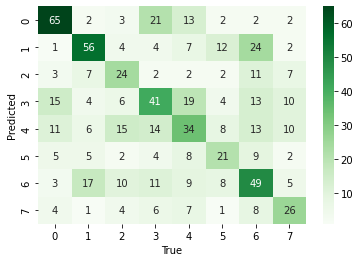

In [16]:
print_confMatrix(y_test,predictions)

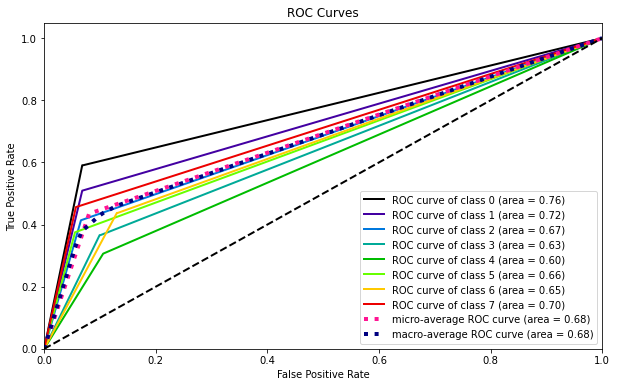

0.6751630483049579


In [17]:
print_rocCurve(learner,X_test,y_test)

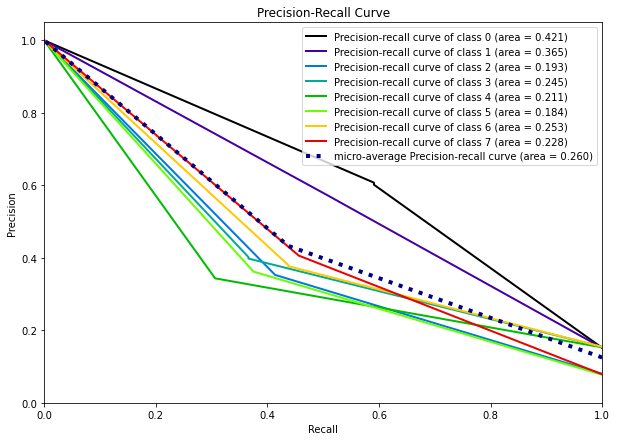

In [18]:
print_precrecCurve(learner,X_test,y_test)

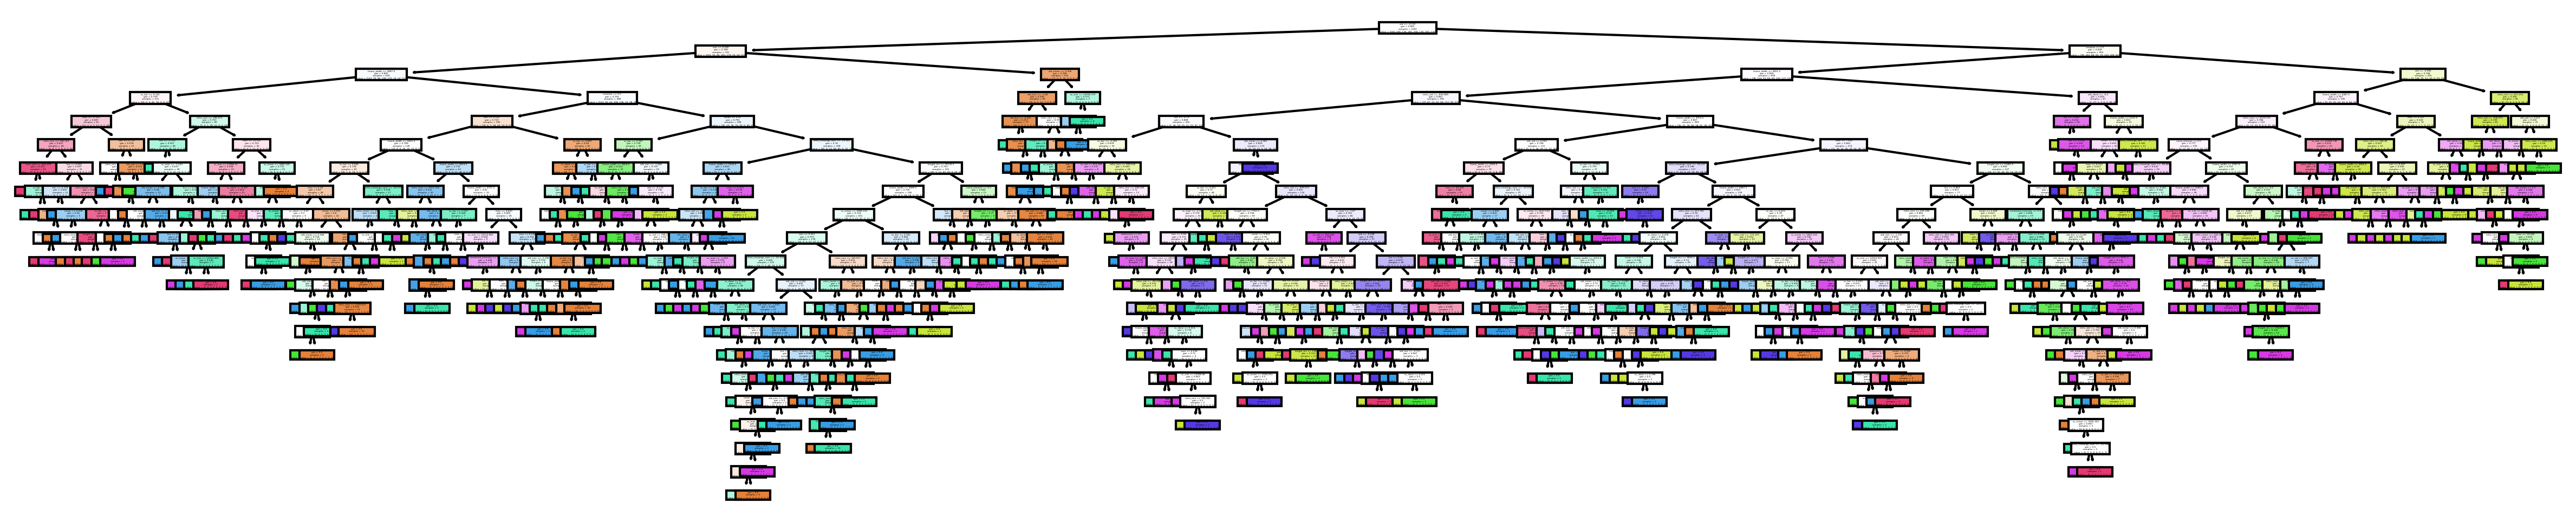

In [19]:
print_DecisionTree(learner)

In [20]:
# Esperimento 2: hyperparameters tuning with "recall_macro" --> controllare perchè con questa metrica non stampa i risultati del training

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20]}

clf=DecisionTreeClassifier()
          
results = customGridSearch(X_train, y_train, clf, check_params, "recall_macro") 


____________________________________________ START GRID SEARCH ____________________________________________
------- Score = recall_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.913 (+/-0.013) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.811 (+/-0.020) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.735 (+/-0.023) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.682 (+/-0.022) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.732 (+/-0.023) for {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.731 (+/-0.023) for {'max_depth': None, 'min_samples_le

In [21]:
results

{'recall_macro': {'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2}}

In [22]:
learner = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62       110
           1       0.56      0.49      0.52       110
           2       0.37      0.40      0.38        58
           3       0.38      0.33      0.35       112
           4       0.36      0.30      0.33       111
           5       0.36      0.39      0.38        56
           6       0.34      0.39      0.37       112
           7       0.37      0.49      0.42        57

    accuracy                           0.43       726
   macro avg       0.42      0.43      0.42       726
weighted avg       0.43      0.43      0.43       726



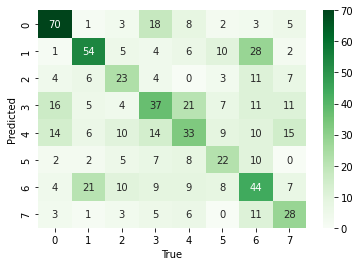

In [24]:
print_confMatrix(y_test,predictions)

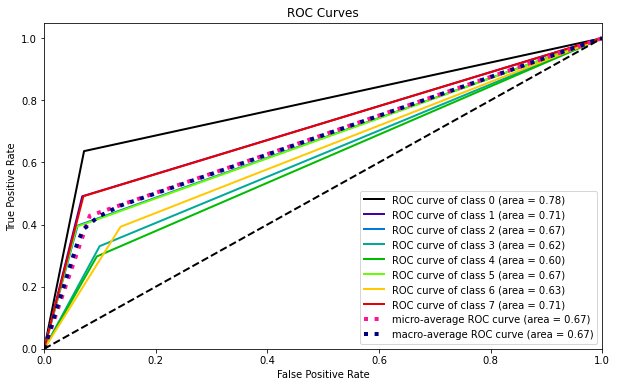

0.6731251411003611


In [25]:
print_rocCurve(learner,X_test,y_test)

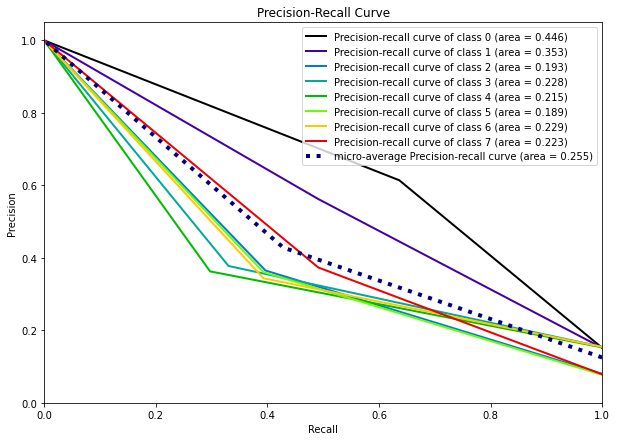

In [26]:
print_precrecCurve(learner,X_test,y_test)

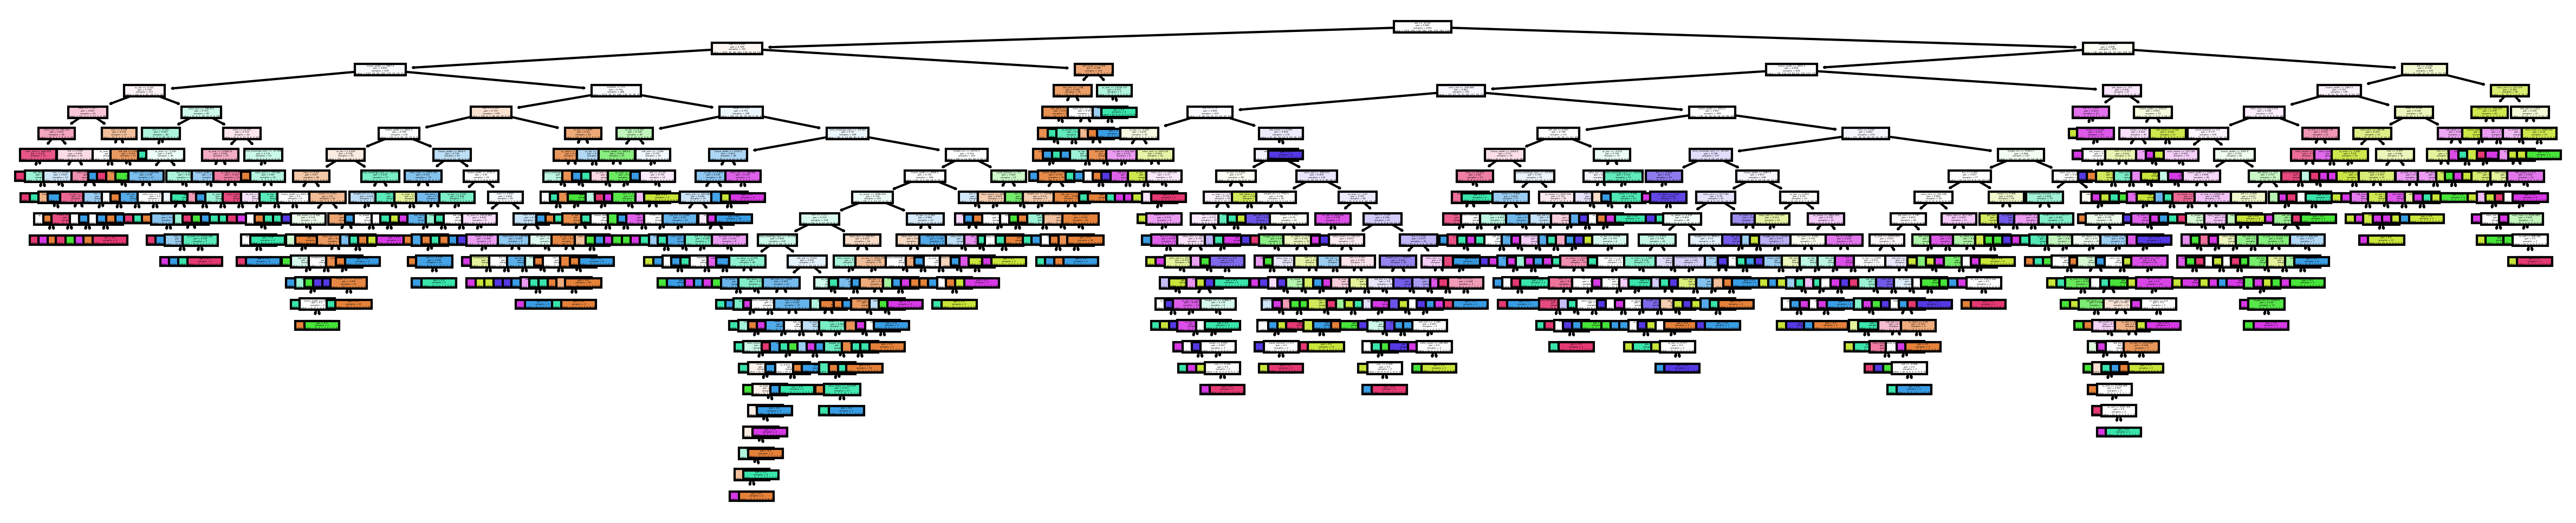

In [27]:
print_DecisionTree(learner)

In [28]:
learner.get_depth

<bound method BaseDecisionTree.get_depth of DecisionTreeClassifier()>

In [29]:
# Esperimento 3: hyperparameters tuning with "precision_macro"

check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20]}

clf=DecisionTreeClassifier()
          
results = customGridSearch(X_train, y_train, clf, check_params, "precision_macro") 

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = precision_macro------- 

> Fold = RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None)



c:\Users\bianc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bianc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bianc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bianc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

> Best Parameter set: 

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}

> Grid scores:

...........RESULTS FOR TRAINING.........
........................................
1.000 (+/-0.000) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.918 (+/-0.011) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.817 (+/-0.018) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.743 (+/-0.017) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.691 (+/-0.023) for {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.740 (+/-0.017) for {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.740 (+/-0.016) for {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.740 (+/-0.016) for {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.694 (+/-0.021) for {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 15}
0.658 (+/-0.021

In [30]:
learner = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5)
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       110
           1       0.55      0.46      0.50       110
           2       0.35      0.43      0.39        58
           3       0.35      0.38      0.36       112
           4       0.34      0.22      0.27       111
           5       0.37      0.43      0.40        56
           6       0.37      0.42      0.39       112
           7       0.33      0.42      0.37        57

    accuracy                           0.42       726
   macro avg       0.41      0.42      0.41       726
weighted avg       0.42      0.42      0.42       726



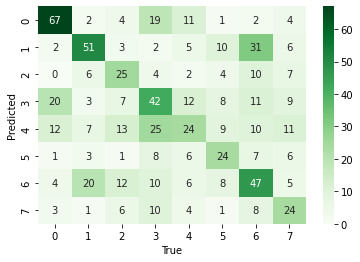

In [32]:
print_confMatrix(y_test,predictions)

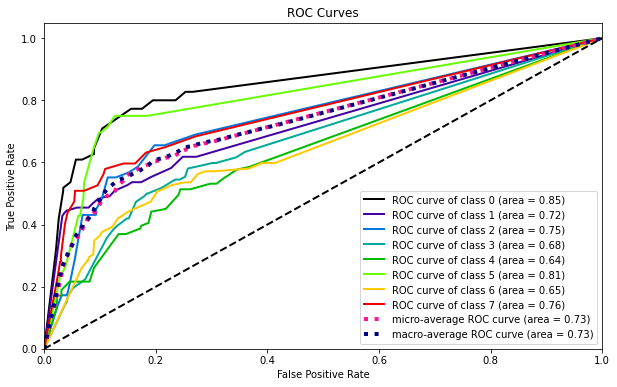

0.7323300872826115


In [33]:
print_rocCurve(learner,X_test,y_test)

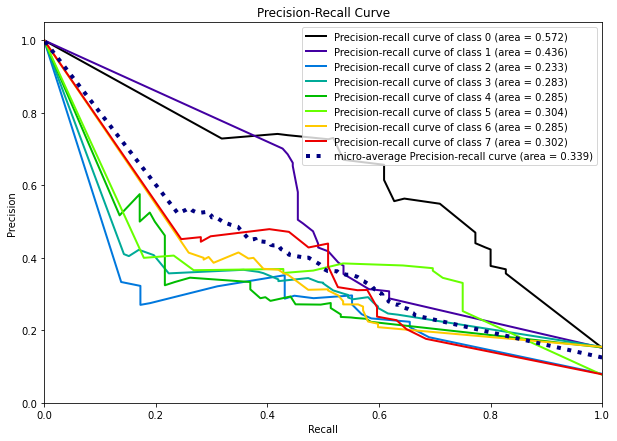

In [34]:
print_precrecCurve(learner,X_test,y_test)

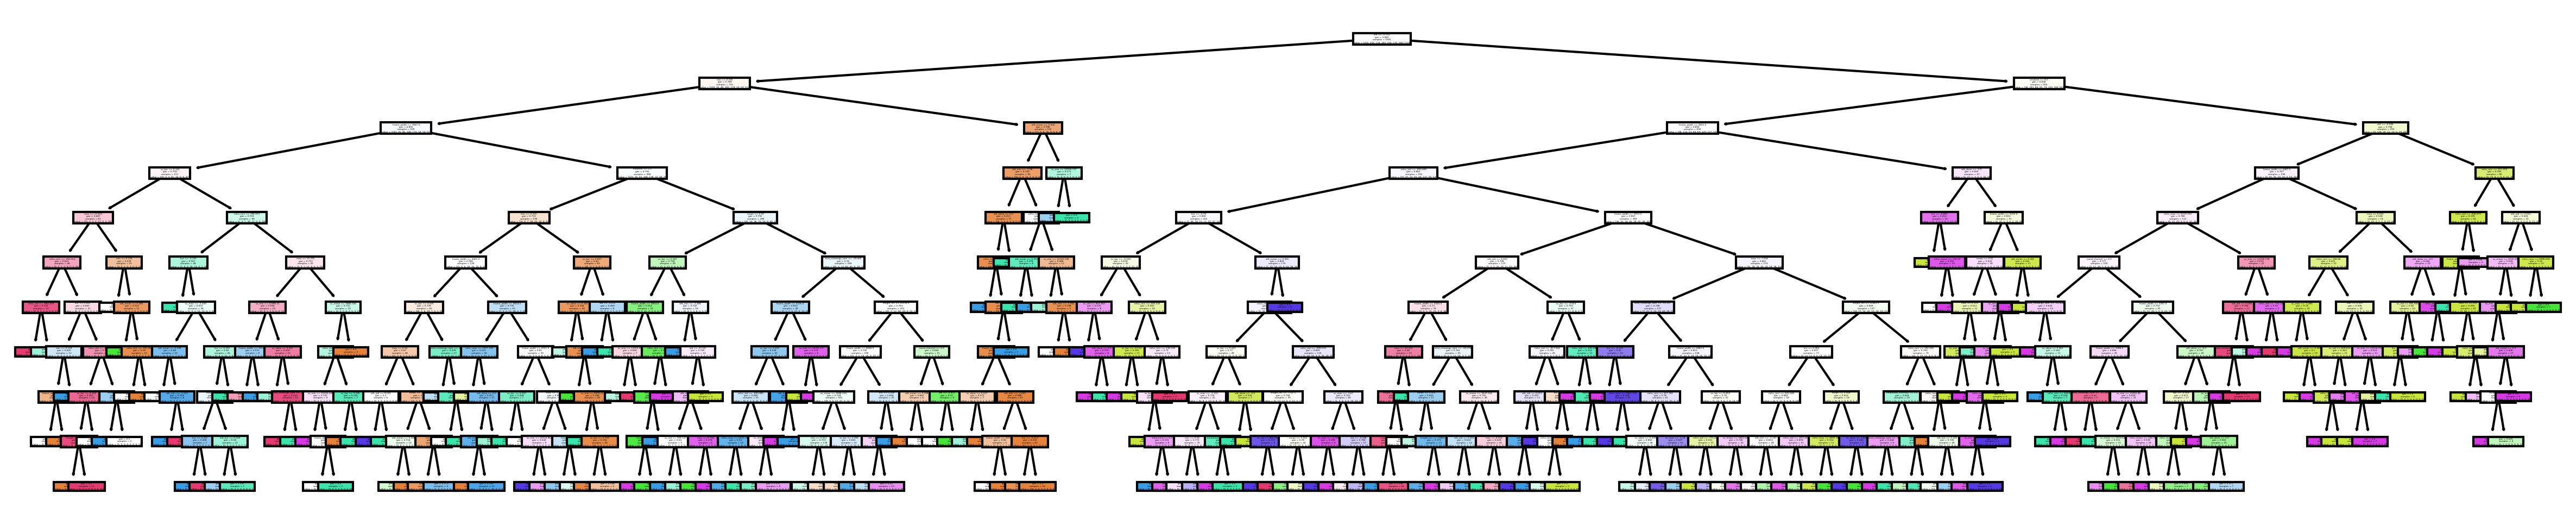

In [35]:
print_DecisionTree(learner)